In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data,test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


C:\Users\bnarapar\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\bnarapar\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [5]:
train_data.shape

(8982,)

In [11]:
len(train_data[10])

31

In [12]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [16]:
#Decoding one of the reviews back to English
word_index=reuters.get_word_index()
reverse_word_index = dict(
[(value,key) for (key,value) in word_index.items()])
decoded_newswire = ' '.join(
[reverse_word_index.get(i-3,'?')for i in train_data[10]]) #indices are offset by 3 because 0,1 and 2 are reserved indices for 'padding', 'start of sequence' and 'unknown'.

In [17]:
#Decoded Example - from numbers to words
decoded_newswire

'? period ended december 31 shr profit 11 cts vs loss 24 cts net profit 224 271 vs loss 511 349 revs 7 258 688 vs 7 200 349 reuter 3'

In [15]:
train_labels[10]

3

In [21]:
word_index['period']

242

In [22]:
#Encoding the integer sequences into a binary matrix
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results= np.zeros((len(sequences),dimension)) #creates an all-zero matrix of shape (len(sequences), dimension)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  #set specific indices of results[i] to 1s
    return results

x_train = vectorize_sequences(train_data)  #vectorized training data
x_test = vectorize_sequences(test_data)    #vectorized test data

In [33]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [40]:
train_labels.min()

0

In [41]:
train_labels.max()

45

In [46]:
one_hot_train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [35]:
one_hot_train_labels.shape

(8982, 46)

In [27]:
from keras import models
from keras import layers

model = models.Sequential([
    layers.Dense(64, activation = 'relu', input_shape=(10000,)),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(46,activation = 'softmax') #The network produces a 46 dimensional vector where output[i] is the probability that the sample belongs to class 'i'. The 46 scores sums up to 1.
])

In [28]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [42]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [47]:
history = model.fit(partial_x_train,partial_y_train, epochs=20, batch_size=512, validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 0s 25ms/step - loss: 2.6139 - accuracy: 0.5306 - val_loss: 1.7140 - val_accuracy: 0.6530
Epoch 2/20
16/16 [==============================] - 0s 16ms/step - loss: 1.4122 - accuracy: 0.7070 - val_loss: 1.2928 - val_accuracy: 0.7220
Epoch 3/20
16/16 [==============================] - 0s 15ms/step - loss: 1.0457 - accuracy: 0.7704 - val_loss: 1.1263 - val_accuracy: 0.7660
Epoch 4/20
16/16 [==============================] - 0s 16ms/step - loss: 0.8138 - accuracy: 0.8277 - val_loss: 1.0108 - val_accuracy: 0.7870
Epoch 5/20
16/16 [==============================] - 0s 16ms/step - loss: 0.6441 - accuracy: 0.8695 - val_loss: 0.9771 - val_accuracy: 0.7800
Epoch 6/20
16/16 [==============================] - 0s 19ms/step - loss: 0.5134 - accuracy: 0.8928 - val_loss: 0.9171 - val_accuracy: 0.8040
Epoch 7/20
16/16 [==============================] - 0s 17ms/step - loss: 0.4142 - accuracy: 0.9126 - val_loss: 0.9138 - val_accuracy: 0.8040
Epoch 8/20
16

In [59]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

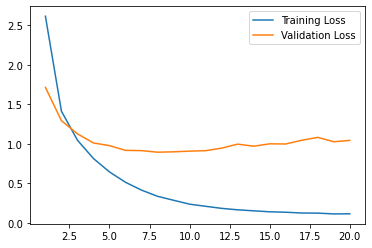

In [61]:
hist=history.history

#Plotting Training and Validation Loss
import matplotlib.pyplot as plt

l=list(range(1,len(history.history['loss'])+1))
plt.plot(l,hist['loss'],label='Training Loss')
plt.plot(l,hist['val_loss'],label='Validation Loss')
plt.legend()
plt.show()

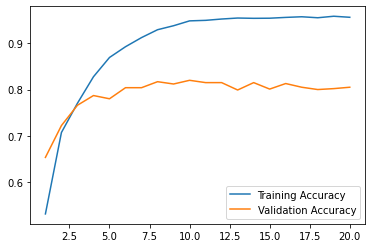

In [62]:
#Plotting Training and Validation Accuracy

plt.plot(l,hist['accuracy'],label='Training Accuracy')
plt.plot(l,hist['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.show()

In [63]:
#Evaluating by model on the test data
model.evaluate(x_test,one_hot_test_labels)

71/71 [==============================] - 0s 1ms/step - loss: 1.2035 - accuracy: 0.7947


[1.2034801244735718, 0.7947462201118469]

From the plot above, it's clear that the network started overfitting after around 9 epochs.

In [67]:
#Generating Predictions on New Data

predictions = model.predict(x_test)

In [69]:
predictions.shape

(2246, 46)

In [72]:
predictions[0]

array([2.23475527e-05, 2.42831049e-07, 5.23016241e-10, 9.58666861e-01,
       4.00557816e-02, 4.06357809e-10, 4.75704383e-13, 8.78393980e-09,
       2.15120199e-05, 4.38799255e-08, 1.63917221e-07, 5.02483221e-04,
       4.23243414e-08, 1.19618171e-05, 9.72123431e-08, 5.79844766e-13,
       5.54247235e-05, 5.99983778e-08, 3.00862894e-07, 4.76145506e-04,
       1.54035690e-04, 1.62233100e-05, 8.76052786e-10, 1.35922729e-09,
       1.18191978e-09, 2.20671609e-06, 9.15542707e-13, 5.27441910e-11,
       1.00131324e-07, 2.09360773e-09, 1.14856320e-07, 2.79717417e-12,
       6.01180572e-09, 6.11488638e-11, 1.09060379e-10, 8.54684590e-09,
       1.38726555e-05, 7.50570370e-11, 4.98361246e-08, 1.15839250e-12,
       6.61133037e-10, 1.51951807e-09, 1.65453248e-16, 2.64089504e-13,
       9.29561286e-17, 3.81536018e-11], dtype=float32)

In [71]:
#An array obviously has 46 elements. Sum of all these elements will be 1
np.sum(predictions[0])

1.0000001

In [73]:
#Maximum value i.e., Maximum probability is
np.max(predictions[0])

0.95866686

In [74]:
#So the maximum probability belongs to the class?
np.argmax(predictions[0])

3

In [75]:
#Let's try using a smaller number of nodes in the intermediate layers than the classes present at the output (viz. 46) and will see the resulting numbers

model = models.Sequential([
    layers.Dense(64, activation = 'relu', input_shape=(10000,)),
    layers.Dense(4, activation = 'relu'),
    layers.Dense(46,activation = 'softmax') #The network produces a 46 dimensional vector where output[i] is the probability that the sample belongs to class 'i'. The 46 scores sums up to 1.
])

In [77]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(partial_x_train,partial_y_train, epochs=20, batch_size=512, validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 0s 23ms/step - loss: 3.0801 - accuracy: 0.2181 - val_loss: 2.5746 - val_accuracy: 0.2340
Epoch 2/20
16/16 [==============================] - 0s 16ms/step - loss: 2.3696 - accuracy: 0.2367 - val_loss: 2.1854 - val_accuracy: 0.2620
Epoch 3/20
16/16 [==============================] - 0s 16ms/step - loss: 2.0141 - accuracy: 0.4102 - val_loss: 1.9305 - val_accuracy: 0.5510
Epoch 4/20
16/16 [==============================] - 0s 16ms/step - loss: 1.7685 - accuracy: 0.5710 - val_loss: 1.7651 - val_accuracy: 0.5750
Epoch 5/20
16/16 [==============================] - 0s 16ms/step - loss: 1.6007 - accuracy: 0.5853 - val_loss: 1.6598 - val_accuracy: 0.5810
Epoch 6/20
16/16 [==============================] - 0s 17ms/step - loss: 1.4817 - accuracy: 0.5947 - val_loss: 1.5984 - val_accuracy: 0.5840
Epoch 7/20
16/16 [==============================] - 0s 17ms/step - loss: 1.3908 - accuracy: 0.6015 - val_loss: 1.5668 - val_accuracy: 0.5870
Epoch 8/20
16

There's a drop of >13% Training Accuracy and ~10% Validation Accuracy because we are trying to compress a lot of information into an intermediate space that is too low-dimensional (4 dimensions).